In [1]:
import pandas as pd

d1 = pd.read_csv("student-mat.csv", sep=";")
d2 = pd.read_csv("student-por.csv", sep=";")

common_cols = ["school", "sex", "age", "address", "famsize", "Pstatus",
               "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"]

d3 = pd.merge(d1, d2, on=common_cols)

print(len(d3)) # 382 studentsdf
d3.head()

382


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [2]:
print(d3.isnull().sum())

school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian_x      0
traveltime_x    0
studytime_x     0
failures_x      0
schoolsup_x     0
famsup_x        0
paid_x          0
activities_x    0
nursery         0
higher_x        0
internet        0
romantic_x      0
famrel_x        0
freetime_x      0
goout_x         0
Dalc_x          0
Walc_x          0
health_x        0
absences_x      0
G1_x            0
G2_x            0
G3_x            0
guardian_y      0
traveltime_y    0
studytime_y     0
failures_y      0
schoolsup_y     0
famsup_y        0
paid_y          0
activities_y    0
higher_y        0
romantic_y      0
famrel_y        0
freetime_y      0
goout_y         0
Dalc_y          0
Walc_y          0
health_y        0
absences_y      0
G1_y            0
G2_y            0
G3_y            0
dtype: int64


C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


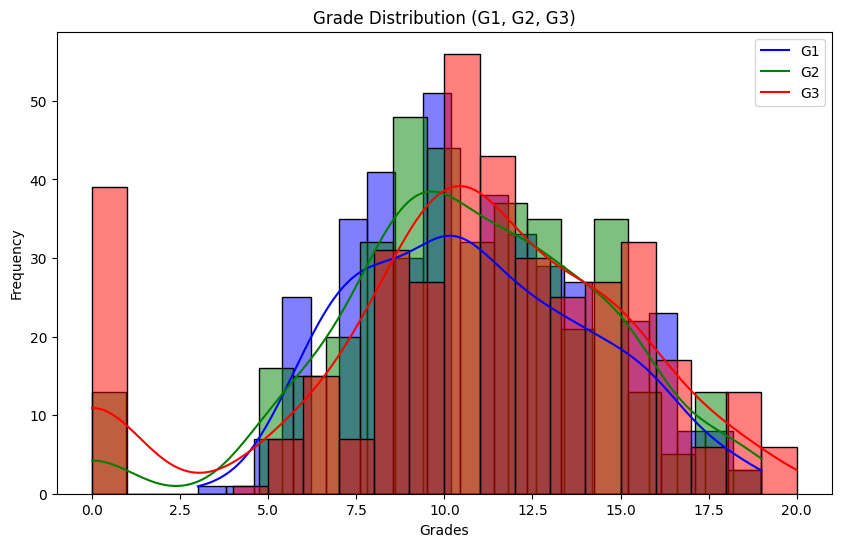

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(d3['G1_x'], bins=20, kde=True, color='blue')
sns.histplot(d3['G2_x'], bins=20, kde=True, color='green')
sns.histplot(d3['G3_x'], bins=20, kde=True, color='red')
plt.title('Grade Distribution (G1, G2, G3)')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.legend(['G1', 'G2', 'G3'])
plt.show()


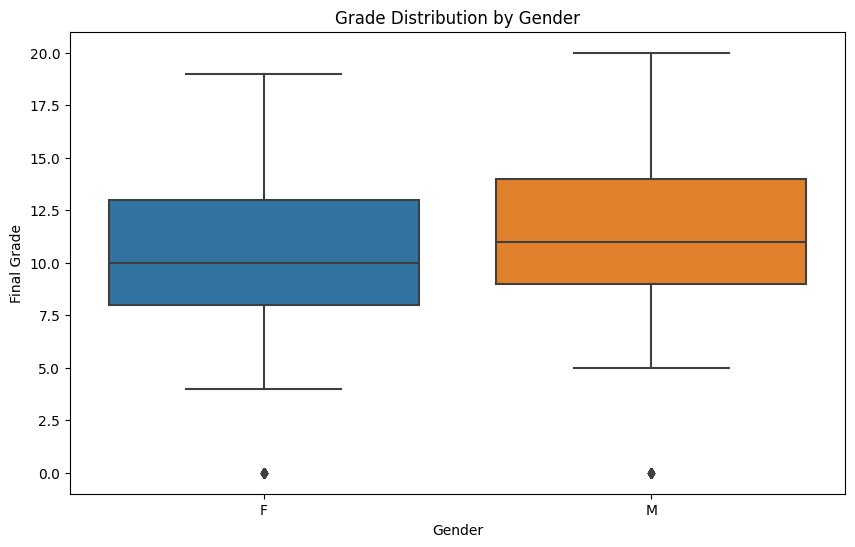

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='G3_x', data=d3)
plt.title('Grade Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Final Grade')
plt.show()


C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

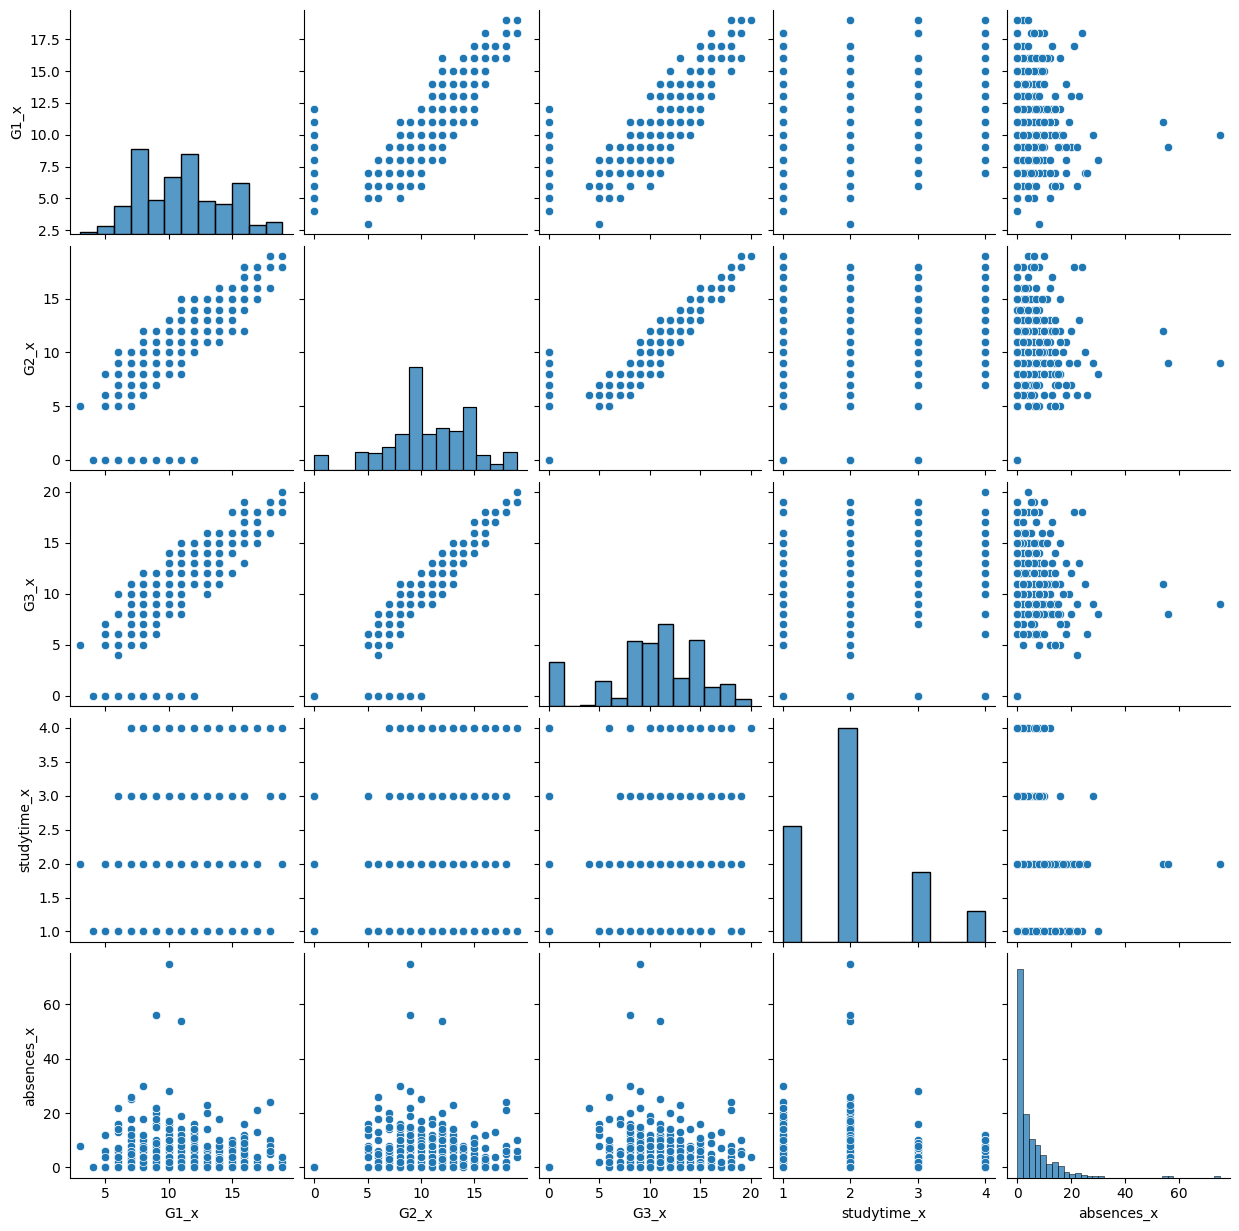

In [5]:
sns.pairplot(d3[['G1_x', 'G2_x', 'G3_x', 'studytime_x', 'absences_x']])
plt.show()


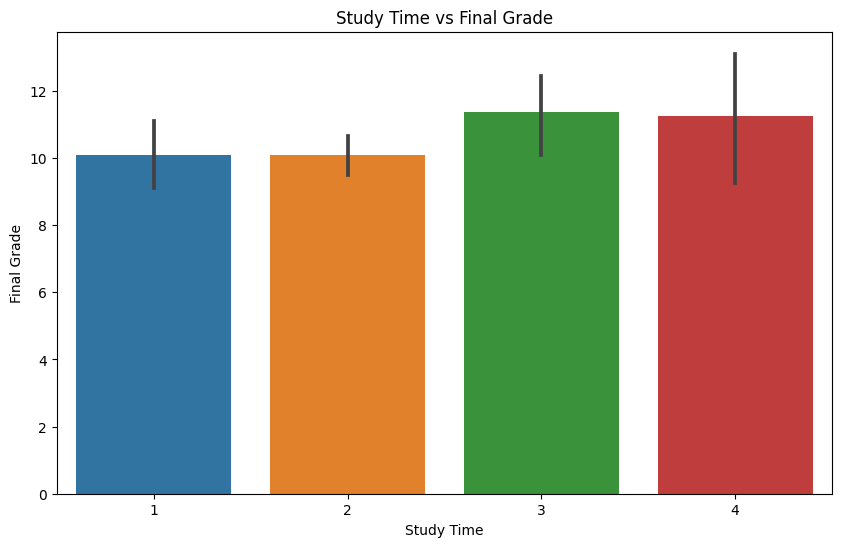

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x='studytime_x', y='G3_x', data=d3)
plt.title('Study Time vs Final Grade')
plt.xlabel('Study Time')
plt.ylabel('Final Grade')
plt.show()


In [21]:
#Normality Tests(studytime_x)
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

stat, p_value= shapiro(d1['studytime'])
print(f"Shapiro Wilk Test(studytime_x) /stat: {stat} ,/ p-value: {p_value} ")
print("-------------------------------------------------")
stat, p_value= normaltest(d1['studytime'])
print(f"D'Agostino's k^2 Test(studytime_x) /stat: {stat} ,/ p-value: {p_value} ")
print("-------------------------------------------------")

result = anderson(d1['studytime'])
print(f'Anderson-Darling Test(studytime_x) stat: {result.statistic}')
for i in range(len(result.critical_values)):
    print(f'{result.significance_level[i]}%: {result.critical_values[i]}')

print('*****************************************************************')
#Normality Tests(age)


stat, p_value= shapiro(d1['age'])
print(f"Shapiro Wilk Test(Age) /stat: {stat} ,/ p-value: {p_value} ")
print("-------------------------------------------------")
stat, p_value= normaltest(d1['age'])
print(f"D'Agostino's k^2 Test(Age) /stat: {stat} ,/ p-value: {p_value} ")
print("-------------------------------------------------")

result = anderson(d1['age'])
print(f'Anderson-Darling Test(Age) stat: {result.statistic}')
for i in range(len(result.critical_values)):
    print(f'{result.significance_level[i]}%: {result.critical_values[i]}')

#Normality Tests(G3)

stat, p_value= shapiro(d1['G3'])
print(f"Shapiro Wilk Test(Age) /stat: {stat} ,/ p-value: {p_value} ")
print("-------------------------------------------------")
stat, p_value= normaltest(d1['G3'])
print(f"D'Agostino's k^2 Test(Age) /stat: {stat} ,/ p-value: {p_value} ")
print("-------------------------------------------------")

result = anderson(d1['G3'])
print(f'Anderson-Darling Test(Age) stat: {result.statistic}')
for i in range(len(result.critical_values)):
    print(f'{result.significance_level[i]}%: {result.critical_values[i]}')


print('non of all distrubute normal.')

Shapiro Wilk Test(studytime_x) /stat: 0.8341969847679138 ,/ p-value: 6.547699357619223e-20 
-------------------------------------------------
D'Agostino's k^2 Test(studytime_x) /stat: 23.120125517494067 ,/ p-value: 9.539564163198152e-06 
-------------------------------------------------
Anderson-Darling Test(studytime_x) stat: 27.57995523240652
15.0%: 0.57
10.0%: 0.65
5.0%: 0.779
2.5%: 0.909
1.0%: 1.081
*****************************************************************
Shapiro Wilk Test(Age) /stat: 0.9105901122093201 ,/ p-value: 1.587754619892124e-14 
-------------------------------------------------
D'Agostino's k^2 Test(Age) /stat: 13.440166751317427 ,/ p-value: 0.0012064376222331967 
-------------------------------------------------
Anderson-Darling Test(Age) stat: 12.306917818907664
15.0%: 0.57
10.0%: 0.65
5.0%: 0.779
2.5%: 0.909
1.0%: 1.081
Shapiro Wilk Test(Age) /stat: 0.9287304282188416 ,/ p-value: 8.837149219863283e-13 
-------------------------------------------------
D'Agostin

In [28]:
##Correelation g1 g2 g3

from scipy.stats import chi2_contingency

# split categories the columns
df['G1_cat'] = pd.cut(d3['G1_y'], bins=[0, 10, 15, 20], labels=['low', 'medium', 'high'])
df['G2_cat'] = pd.cut(d3['G2_y'], bins=[0, 10, 15, 20], labels=['low', 'medium', 'high'])
df['G3_cat'] = pd.cut(d3['G3_y'], bins=[0, 10, 15, 20], labels=['low', 'medium', 'high'])

# Chi-Squared Testi
contingency_g1_g2 = pd.crosstab(df['G1_cat'], df['G2_cat'])
contingency_g1_g3 = pd.crosstab(df['G1_cat'], df['G3_cat'])
contingency_g2_g3 = pd.crosstab(df['G2_cat'], df['G3_cat'])

chi2_g1_g2, p_g1_g2, _, _ = chi2_contingency(contingency_g1_g2)
chi2_g1_g3, p_g1_g3, _, _ = chi2_contingency(contingency_g1_g3)
chi2_g2_g3, p_g2_g3, _, _ = chi2_contingency(contingency_g2_g3)

print(f"Chi-Squared Test(Mat):")
print(f"G1 ve G2: Chi2 = {chi2_g1_g2}, p-value = {p_g1_g2}")
print(f"G1 ve G3: Chi2 = {chi2_g1_g3}, p-value = {p_g1_g3}")
print(f"G2 ve G3: Chi2 = {chi2_g2_g3}, p-value = {p_g2_g3}")


# split categories the columns
df['G1_cat'] = pd.cut(d3['G1_x'], bins=[0, 10, 15, 20], labels=['low', 'medium', 'high'])
df['G2_cat'] = pd.cut(d3['G2_x'], bins=[0, 10, 15, 20], labels=['low', 'medium', 'high'])
df['G3_cat'] = pd.cut(d3['G3_x'], bins=[0, 10, 15, 20], labels=['low', 'medium', 'high'])

# Chi-Squared Testi
contingency_g1_g2 = pd.crosstab(df['G1_cat'], df['G2_cat'])
contingency_g1_g3 = pd.crosstab(df['G1_cat'], df['G3_cat'])
contingency_g2_g3 = pd.crosstab(df['G2_cat'], df['G3_cat'])

chi2_g1_g2, p_g1_g2, _, _ = chi2_contingency(contingency_g1_g2)
chi2_g1_g3, p_g1_g3, _, _ = chi2_contingency(contingency_g1_g3)
chi2_g2_g3, p_g2_g3, _, _ = chi2_contingency(contingency_g2_g3)

print(f"Chi-Squared Test(Por):")
print(f"G1 ve G2: Chi2 = {chi2_g1_g2}, p-value = {p_g1_g2}")
print(f"G1 ve G3: Chi2 = {chi2_g1_g3}, p-value = {p_g1_g3}")
print(f"G2 ve G3: Chi2 = {chi2_g2_g3}, p-value = {p_g2_g3}")



Chi-Squared Test(Mat):
G1 ve G2: Chi2 = 370.2126339977317, p-value = 7.570230036086417e-79
G1 ve G3: Chi2 = 325.20322238182, p-value = 3.95189218406931e-69
G2 ve G3: Chi2 = 442.5316401774937, p-value = 1.7879195942044193e-94
Chi-Squared Test(Por):
G1 ve G2: Chi2 = 404.32171797290346, p-value = 3.2396233890098195e-86
G1 ve G3: Chi2 = 325.7448127774561, p-value = 3.019384923878293e-69
G2 ve G3: Chi2 = 450.2366380693634, p-value = 3.860930785599392e-96


In [35]:
from scipy.stats import spearmanr, kendalltau

# Spearman Korelasyon Test(Mat)
spearman_g1_g2, p_spearman_g1_g2 = spearmanr(d3['G1_x'], d3['G2_x'])
spearman_g1_g3, p_spearman_g1_g3 = spearmanr(d3['G1_x'], d3['G3_x'])
spearman_g2_g3, p_spearman_g2_g3 = spearmanr(d3['G2_x'], d3['G3_x'])

print(f"\nSpearman Korelasyon Test(Mat):")
print(f"G1 ve G2: Spearman's rho = {spearman_g1_g2}, p-value = {p_spearman_g1_g2}")
print(f"G1 ve G3: Spearman's rho = {spearman_g1_g3}, p-value = {p_spearman_g1_g3}")
print(f"G2 ve G3: Spearman's rho = {spearman_g2_g3}, p-value = {p_spearman_g2_g3}")

# Kendall's Tau Korelasyon Testi(Mat)
kendall_g1_g2, p_kendall_g1_g2 = kendalltau(d3['G1_x'], d3['G2_x'])
kendall_g1_g3, p_kendall_g1_g3 = kendalltau(d3['G1_x'], d3['G3_x'])
kendall_g2_g3, p_kendall_g2_g3 = kendalltau(d3['G2_x'], d3['G3_x'])

print(f"\nKendall's Tau Korelasyon Testi(Mat):")
print(f"G1 ve G2: Kendall's Tau = {kendall_g1_g2}, p-value = {p_kendall_g1_g2}")
print(f"G1 ve G3: Kendall's Tau = {kendall_g1_g3}, p-value = {p_kendall_g1_g3}")
print(f"G2 ve G3: Kendall's Tau = {kendall_g2_g3}, p-value = {p_kendall_g2_g3}")



Spearman Korelasyon Test(Mat):
G1 ve G2: Spearman's rho = 0.8996199583477272, p-value = 8.262550589521865e-139
G1 ve G3: Spearman's rho = 0.8784203953537756, p-value = 6.484753029752201e-124
G2 ve G3: Spearman's rho = 0.9556478217877887, p-value = 7.770002975949791e-204

Kendall's Tau Korelasyon Testi(Mat):
G1 ve G2: Kendall's Tau = 0.7826815824845883, p-value = 1.989719618905919e-99
G1 ve G3: Kendall's Tau = 0.7489389748799842, p-value = 4.8916369491685003e-91
G2 ve G3: Kendall's Tau = 0.8821953941222934, p-value = 7.363075311471341e-126


In [46]:
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare

stat, p_value = mannwhitneyu(d3['G1_y'], d3['G2_y'])

print(f"Mann Whitney U statistic(Mat G1-G2): {stat}, p-value: {p_value}")

from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(d3['G1_x'], d3['G2_x'])

print(f"Mann Whitney U statistic(Por G1-G2): {stat}, p-value: {p_value}")

print('---------------------------------------------------------')
#Kruskal
stat, p_value = kruskal(d3['G2_x'],d3['G3_x'])

print(f"Kruskal (Mat G2-G3): stat: {stat}, p-value: {p_value}")

stat, p_value = kruskal(d3['G2_y'],d3['G3_y'])

print(f"Kruskal (Por G2-G3): stat: {stat}, p-value: {p_value}")

print('---------------------------------------------------------')

#Friedman

stat, p_value= friedmanchisquare(d3['G1_x'],d3['G2_x'],d3['G3_x'])

print(f"Friedman Test(Mat): stat: {stat}, p-value: {p_value}")


stat, p_value= friedmanchisquare(d3['G1_y'],d3['G2_y'],d3['G3_y'])

print(f"Friedman Test(Por): stat: {stat}, p-value: {p_value}")



Mann Whitney U statistic(Mat G1-G2): 71805.0, p-value: 0.7024587909566072
Mann Whitney U statistic(Por G1-G2): 72526.0, p-value: 0.8860440603644331
---------------------------------------------------------
Kruskal (Mat G2-G3): stat: 0.007348554916575233, p-value: 0.9316860515148704
Kruskal (Por G2-G3): stat: 5.152808055986694, p-value: 0.02320881184483882
---------------------------------------------------------
Friedman Test(Mat): stat: 1.627649769585857, p-value: 0.4431597853053121
Friedman Test(Por): stat: 78.50000000000017, p-value: 8.99376602902803e-18
